# Objetivos deste trabalho
- Familiarizar-se com a biblioteca PyTorch
- Definir arquiteturas MLP simples em PyTorch
- Treinar utilizando CIFAR10, testando diferentes arquiteturas, parâmetros, funções de loss e otimizadores
- Comparar os resultados obtidos utilizando apenas Perpceptrons

In [1]:
%matplotlib inline

import numpy as np 
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import torchvision
import torchvision.transforms as transforms

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [3]:
# Carregar os datasets

transform=transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor()
])

dataset_train = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

dataset_test = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
train_loader = DataLoader(dataset=dataset_train, shuffle=True, batch_size=200)
test_loader = DataLoader(dataset=dataset_test, shuffle=False, batch_size=200)

In [5]:
# Definir a arquitetura MLP

class MLP(nn.Module):

    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(32*32, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)
        self.activation_function = torch.nn.ReLU()
        
    def forward(self, x):
        x = x.view(-1, 32*32)
        x = self.activation_function(self.fc1(x))
        x = self.activation_function(self.fc2(x))
        x = self.activation_function(self.fc3(x))
        return x

In [6]:
model = MLP().to(device)
# Definir otimizador e loss
# Nota: testar outros otimizadores e funções de loss (em particular cross entropy)
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-2, weight_decay=1e-4)
loss_fn = torch.nn.CrossEntropyLoss().cuda()

print(device)
print(model)

cuda:0
MLP(
  (fc1): Linear(in_features=1024, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (activation_function): ReLU()
)


In [7]:
# Realizar o treinamento aqui
losses = []
def train_model(model, epochs, train_loader, losses):
    inputs_list = []
    labels_list = []
    for _, (inputs, labels) in enumerate(train_loader):
        inputs_list.append(inputs.to(device))
        labels_list.append(labels.to(device))

    
    for epoch in range(epochs):
        running_loss = 0.0

        for i, (inputs, labels) in enumerate(zip(inputs_list, labels_list), 0):
            optimizer.zero_grad()

            y_pred = model(inputs)
            loss = loss_fn(y_pred, labels)
            loss.backward()
            optimizer.step()
        
            running_loss += loss.item()
            if i % 250 == 249:
                print('[%d] loss: %.3f' %
                      (epoch + 1, running_loss / 250))
                losses.append(running_loss / 250)
                running_loss = 0.0
                

# Trainamento do Modelo
- Ativação: ReLu
- Loss: CrossEntropy
- Hidden: 3
- Regularizador: L2
- Taxa de Aprendizado = 1e-3

In [8]:
losses = []
# Treinamento por 300 Épocas
train_model(model, 300, train_loader, losses)

[1] loss: 2.301
[2] loss: 2.295
[3] loss: 2.289
[4] loss: 2.282
[5] loss: 2.275
[6] loss: 2.266
[7] loss: 2.257
[8] loss: 2.243
[9] loss: 2.231
[10] loss: 2.221
[11] loss: 2.211
[12] loss: 2.203
[13] loss: 2.195
[14] loss: 2.189
[15] loss: 2.184
[16] loss: 2.179
[17] loss: 2.164
[18] loss: 2.150
[19] loss: 2.142
[20] loss: 2.136
[21] loss: 2.131
[22] loss: 2.126
[23] loss: 2.121
[24] loss: 2.117
[25] loss: 2.113
[26] loss: 2.108
[27] loss: 2.104
[28] loss: 2.100
[29] loss: 2.096
[30] loss: 2.092
[31] loss: 2.074
[32] loss: 2.055
[33] loss: 2.047
[34] loss: 1.997
[35] loss: 1.967
[36] loss: 1.953
[37] loss: 1.943
[38] loss: 1.933
[39] loss: 1.925
[40] loss: 1.916
[41] loss: 1.908
[42] loss: 1.900
[43] loss: 1.892
[44] loss: 1.885
[45] loss: 1.877
[46] loss: 1.870
[47] loss: 1.863
[48] loss: 1.856
[49] loss: 1.850
[50] loss: 1.843
[51] loss: 1.837
[52] loss: 1.831
[53] loss: 1.824
[54] loss: 1.818
[55] loss: 1.812
[56] loss: 1.806
[57] loss: 1.800
[58] loss: 1.795
[59] loss: 1.789
[60] l

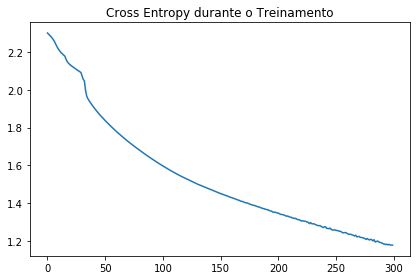

In [9]:
import matplotlib.pyplot as plt
plt.title("Cross Entropy durante o Treinamento")
plt.tight_layout()
_ = plt.plot(losses)
plt.show()

In [10]:
def one_hot(results):
    results = results.cpu().detach().numpy().tolist()[0]
    return results.index(max(results))

def evaluate(model, dataset):
    inputs_list = []
    labels_list = []
    for _, (inputs, labels) in enumerate(dataset):
        inputs_list.append(inputs.to(device))
        labels_list.append(labels.to(device))

    acuracia = 0
    results = [0,0,0,0,0,0,0,0,0,0]
    for i, (inputs, labels) in enumerate(zip(inputs_list, labels_list), 0):
        y_pred = model(inputs)

        result = one_hot(y_pred)

        if result == labels.item():
            acuracia += 1

        results[result] += 1
        
    print(acuracia / len(dataset) * 100, "%")
    print(results)

In [11]:
train_loader = DataLoader(dataset=dataset_train, shuffle=True, batch_size=1)
test_loader = DataLoader(dataset=dataset_test, shuffle=False, batch_size=1)

# Avaliação do Modelo no dataset de Treino

In [12]:
evaluate(model, train_loader)

59.294000000000004 %
[5533, 4334, 5964, 4706, 3013, 5195, 3893, 4615, 6444, 6303]


# Avaliação do Modelo (conjunto de teste)

In [13]:
evaluate(model, test_loader)

44.31 %
[1114, 808, 1272, 976, 596, 1052, 703, 880, 1320, 1279]


<h3> É possível observar um desempenho muito melhor que utilizar apenas uma camada de perceptrons. Mas podemos deixar o modelo treinar por mais tempo para ver o que acontece... </h3>

In [14]:
train_loader = DataLoader(dataset=dataset_train, shuffle=True, batch_size=200)
test_loader = DataLoader(dataset=dataset_test, shuffle=False, batch_size=200)

losses = []
# Treinamento por mais 700 Épocas
train_model(model, 700, train_loader, losses)

[1] loss: 1.221
[2] loss: 1.212
[3] loss: 1.207
[4] loss: 1.202
[5] loss: 1.197
[6] loss: 1.193
[7] loss: 1.190
[8] loss: 1.187
[9] loss: 1.182
[10] loss: 1.180
[11] loss: 1.177
[12] loss: 1.173
[13] loss: 1.172
[14] loss: 1.168
[15] loss: 1.166
[16] loss: 1.163
[17] loss: 1.160
[18] loss: 1.161
[19] loss: 1.155
[20] loss: 1.157
[21] loss: 1.151
[22] loss: 1.153
[23] loss: 1.145
[24] loss: 1.146
[25] loss: 1.143
[26] loss: 1.146
[27] loss: 1.142
[28] loss: 1.138
[29] loss: 1.135
[30] loss: 1.137
[31] loss: 1.130
[32] loss: 1.131
[33] loss: 1.131
[34] loss: 1.128
[35] loss: 1.123
[36] loss: 1.126
[37] loss: 1.123
[38] loss: 1.126
[39] loss: 1.117
[40] loss: 1.119
[41] loss: 1.111
[42] loss: 1.118
[43] loss: 1.109
[44] loss: 1.111
[45] loss: 1.113
[46] loss: 1.111
[47] loss: 1.105
[48] loss: 1.098
[49] loss: 1.103
[50] loss: 1.098
[51] loss: 1.099
[52] loss: 1.097
[53] loss: 1.096
[54] loss: 1.092
[55] loss: 1.087
[56] loss: 1.099
[57] loss: 1.084
[58] loss: 1.084
[59] loss: 1.094
[60] l

[463] loss: 0.604
[464] loss: 0.598
[465] loss: 0.597
[466] loss: 0.592
[467] loss: 0.601
[468] loss: 0.576
[469] loss: 0.563
[470] loss: 0.620
[471] loss: 0.584
[472] loss: 0.570
[473] loss: 0.581
[474] loss: 0.580
[475] loss: 0.576
[476] loss: 0.584
[477] loss: 0.587
[478] loss: 0.587
[479] loss: 0.567
[480] loss: 0.561
[481] loss: 0.575
[482] loss: 0.595
[483] loss: 0.567
[484] loss: 0.574
[485] loss: 0.570
[486] loss: 0.543
[487] loss: 0.588
[488] loss: 0.588
[489] loss: 0.537
[490] loss: 0.545
[491] loss: 0.603
[492] loss: 0.570
[493] loss: 0.538
[494] loss: 0.579
[495] loss: 0.568
[496] loss: 0.581
[497] loss: 0.567
[498] loss: 0.553
[499] loss: 0.567
[500] loss: 0.560
[501] loss: 0.565
[502] loss: 0.540
[503] loss: 0.543
[504] loss: 0.579
[505] loss: 0.550
[506] loss: 0.573
[507] loss: 0.553
[508] loss: 0.550
[509] loss: 0.546
[510] loss: 0.575
[511] loss: 0.532
[512] loss: 0.542
[513] loss: 0.540
[514] loss: 0.549
[515] loss: 0.532
[516] loss: 0.567
[517] loss: 0.531
[518] loss

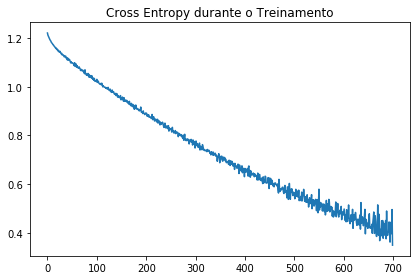

In [15]:
plt.title("Cross Entropy durante o Treinamento")
plt.tight_layout()
_ = plt.plot(losses)
plt.show()

In [16]:
train_loader = DataLoader(dataset=dataset_train, shuffle=True, batch_size=1)
test_loader = DataLoader(dataset=dataset_test, shuffle=False, batch_size=1)

# Avaliação do modelo nos datasets de Treino e Teste, respectivamente:

In [17]:
evaluate(model, train_loader)

85.15599999999999 %
[4538, 5061, 4872, 5793, 4328, 3995, 4601, 5907, 5281, 5624]


In [18]:
evaluate(model, test_loader)

42.620000000000005 %
[896, 975, 987, 1221, 792, 730, 801, 1246, 1125, 1227]


<h3> Podemos observar que o modelo melhorou muito seu desempenho com os dados de treino, mas não com os de teste (inclusive piorou).</h3>

<h2> E se reduzirmos a complexidade do nosso modelo?</h2>

In [19]:
# Definir a arquitetura MLP

class MLP(nn.Module):

    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(32*32, 80)
        self.fc2 = nn.Linear(80, 10)
        self.activation_function = torch.nn.ReLU()
        
    def forward(self, x):
        x = x.view(-1, 32*32)
        x = self.activation_function(self.fc1(x))
        x = self.activation_function(self.fc2(x))
        return x

In [20]:
model = MLP().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-2, weight_decay=1e-4)
loss_fn = torch.nn.CrossEntropyLoss().cuda()

train_loader = DataLoader(dataset=dataset_train, shuffle=True, batch_size=200)
test_loader = DataLoader(dataset=dataset_test, shuffle=False, batch_size=200)

losses = []
train_model(model, 1000, train_loader, losses)

[1] loss: 2.273
[2] loss: 2.230
[3] loss: 2.201
[4] loss: 2.181
[5] loss: 2.165
[6] loss: 2.152
[7] loss: 2.140
[8] loss: 2.131
[9] loss: 2.124
[10] loss: 2.117
[11] loss: 2.112
[12] loss: 2.097
[13] loss: 2.079
[14] loss: 2.069
[15] loss: 2.062
[16] loss: 2.055
[17] loss: 2.050
[18] loss: 2.044
[19] loss: 2.039
[20] loss: 2.025
[21] loss: 1.996
[22] loss: 1.986
[23] loss: 1.978
[24] loss: 1.970
[25] loss: 1.962
[26] loss: 1.955
[27] loss: 1.948
[28] loss: 1.941
[29] loss: 1.934
[30] loss: 1.927
[31] loss: 1.921
[32] loss: 1.914
[33] loss: 1.908
[34] loss: 1.902
[35] loss: 1.896
[36] loss: 1.890
[37] loss: 1.884
[38] loss: 1.879
[39] loss: 1.873
[40] loss: 1.868
[41] loss: 1.863
[42] loss: 1.858
[43] loss: 1.853
[44] loss: 1.848
[45] loss: 1.844
[46] loss: 1.839
[47] loss: 1.835
[48] loss: 1.831
[49] loss: 1.827
[50] loss: 1.823
[51] loss: 1.819
[52] loss: 1.815
[53] loss: 1.812
[54] loss: 1.808
[55] loss: 1.805
[56] loss: 1.801
[57] loss: 1.798
[58] loss: 1.795
[59] loss: 1.792
[60] l

[463] loss: 1.388
[464] loss: 1.388
[465] loss: 1.387
[466] loss: 1.387
[467] loss: 1.386
[468] loss: 1.386
[469] loss: 1.385
[470] loss: 1.385
[471] loss: 1.384
[472] loss: 1.384
[473] loss: 1.384
[474] loss: 1.383
[475] loss: 1.383
[476] loss: 1.382
[477] loss: 1.382
[478] loss: 1.381
[479] loss: 1.381
[480] loss: 1.380
[481] loss: 1.380
[482] loss: 1.380
[483] loss: 1.379
[484] loss: 1.379
[485] loss: 1.378
[486] loss: 1.378
[487] loss: 1.377
[488] loss: 1.377
[489] loss: 1.376
[490] loss: 1.376
[491] loss: 1.375
[492] loss: 1.375
[493] loss: 1.375
[494] loss: 1.374
[495] loss: 1.374
[496] loss: 1.373
[497] loss: 1.373
[498] loss: 1.372
[499] loss: 1.372
[500] loss: 1.371
[501] loss: 1.371
[502] loss: 1.371
[503] loss: 1.370
[504] loss: 1.370
[505] loss: 1.369
[506] loss: 1.369
[507] loss: 1.368
[508] loss: 1.368
[509] loss: 1.367
[510] loss: 1.367
[511] loss: 1.367
[512] loss: 1.366
[513] loss: 1.366
[514] loss: 1.365
[515] loss: 1.365
[516] loss: 1.364
[517] loss: 1.364
[518] loss

[919] loss: 1.230
[920] loss: 1.232
[921] loss: 1.230
[922] loss: 1.231
[923] loss: 1.230
[924] loss: 1.230
[925] loss: 1.228
[926] loss: 1.228
[927] loss: 1.230
[928] loss: 1.227
[929] loss: 1.229
[930] loss: 1.227
[931] loss: 1.226
[932] loss: 1.225
[933] loss: 1.227
[934] loss: 1.229
[935] loss: 1.226
[936] loss: 1.226
[937] loss: 1.225
[938] loss: 1.225
[939] loss: 1.227
[940] loss: 1.225
[941] loss: 1.223
[942] loss: 1.226
[943] loss: 1.224
[944] loss: 1.223
[945] loss: 1.222
[946] loss: 1.227
[947] loss: 1.223
[948] loss: 1.222
[949] loss: 1.227
[950] loss: 1.223
[951] loss: 1.222
[952] loss: 1.223
[953] loss: 1.225
[954] loss: 1.220
[955] loss: 1.222
[956] loss: 1.220
[957] loss: 1.223
[958] loss: 1.220
[959] loss: 1.222
[960] loss: 1.221
[961] loss: 1.221
[962] loss: 1.218
[963] loss: 1.220
[964] loss: 1.220
[965] loss: 1.220
[966] loss: 1.219
[967] loss: 1.219
[968] loss: 1.217
[969] loss: 1.220
[970] loss: 1.219
[971] loss: 1.217
[972] loss: 1.219
[973] loss: 1.217
[974] loss

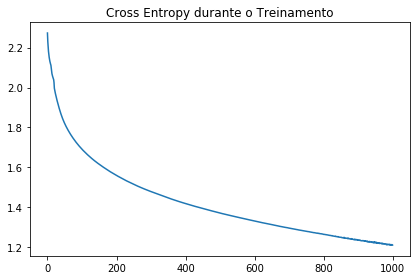

In [21]:
plt.title("Cross Entropy durante o Treinamento")
plt.tight_layout()
_ = plt.plot(losses)
plt.show()

In [22]:
train_loader = DataLoader(dataset=dataset_train, shuffle=True, batch_size=1)
test_loader = DataLoader(dataset=dataset_test, shuffle=False, batch_size=1)

# TESTES

In [23]:
evaluate(model, train_loader)

57.67400000000001 %
[5733, 6716, 4349, 4381, 5130, 3420, 4664, 7112, 3865, 4630]


In [24]:
evaluate(model, test_loader)

41.349999999999994 %
[1150, 1293, 956, 872, 1044, 683, 861, 1409, 801, 931]


<h5> Nota-se que o desempenho se mantem próximo ao anterior, com uma diferença menor no desempenho entre treino e teste, e com um modelo mais simples <h5>